In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor

In [12]:
from sklearn.svm import SVC
from sklearn.svm import SVR

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [14]:
from sklearn.datasets import make_regression
from sklearn.datasets import make_classification
from sklearn.datasets import make_gaussian_quantiles

In [15]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve

In [16]:
from sklearn.metrics import plot_roc_curve, plot_confusion_matrix, plot_precision_recall_curve

In [17]:
def Decision_Boundary(model, X, y, n_points, n_classes, colors, class_names):
    
    xmin, xmax = np.min(X[:,0]), np.max(X[:,0])
    ymin, ymax = np.min(X[:,1]), np.max(X[:,1])
    x_grid = np.linspace(xmin, xmax, n_points)
    y_grid = np.linspace(ymin, ymax, n_points)
    xy_grid_x, xy_grid_y = np.meshgrid(x_grid, y_grid)
    xy_grid = np.array([xy_grid_x.ravel(), xy_grid_y.ravel()]).T
    predict_labels = model.predict(xy_grid)
    labels = range(n_classes)
    tt = zip(colors, class_names, labels)
    
    plt.figure (figsize = (20,10))
    plt.contourf(xy_grid_x, xy_grid_y,  predict_labels.reshape(n_points,n_points), cmap = plt.cm.Paired, alpha = 0.5)
    for colors, class_names, labels in tt:
        idx = np.where(y == labels)
        plt.scatter(X[idx,0],X[idx,1], label = class_names, c = colors, s = 40, edgecolor = 'k',cmap = plt.cm.copper)
    plt.legend()
    plt.xlim(xmin-1, xmax+1)
    plt.ylim(ymin-1, ymax+1)
    plt.show()

# Classification - Decision Boundaries

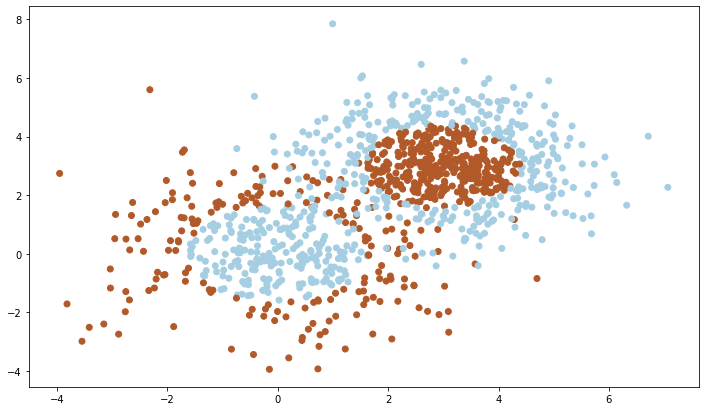

In [45]:
X1, y1 = make_gaussian_quantiles(cov = 2, n_samples=400, n_features=2, n_classes = 2, random_state=1)
X2, y2 = make_gaussian_quantiles(mean=(3, 3), cov=1.5, n_samples=700, n_features=2, n_classes=2, random_state=1)   

X = np.concatenate((X1, X2))
y = np.concatenate((y1, -y2 + 1))

plt.figure(figsize = (12,7))
plt.scatter(X[:,0], X[:,1], c = y, cmap = plt.cm.Paired)
plt.show()

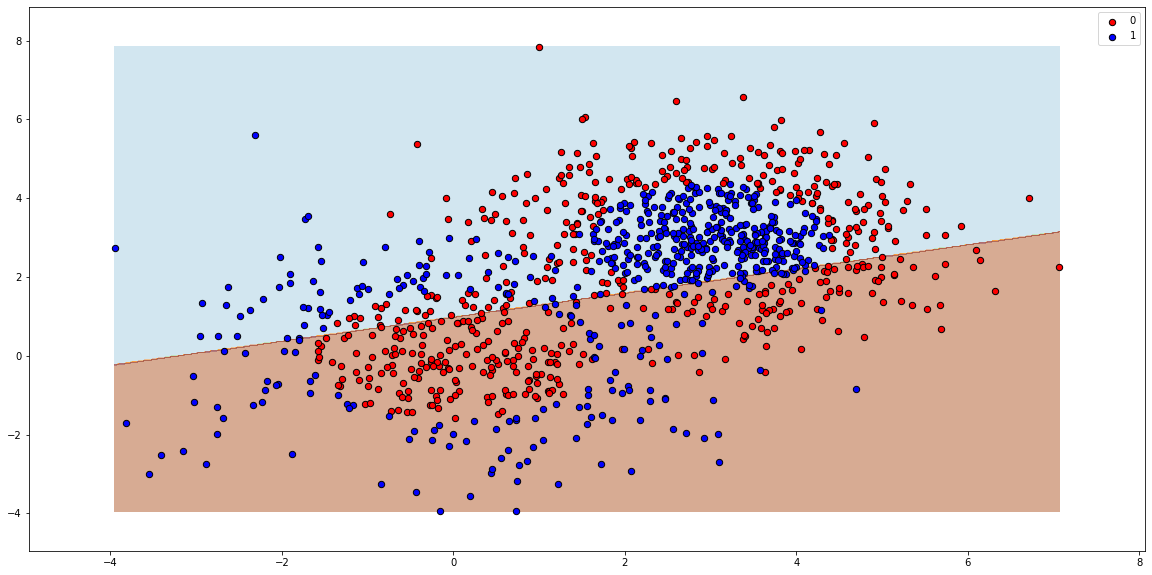

In [49]:
mod_svm_lin = SVC(max_iter = 100000, kernel = 'poly', degree = 1)
mod_svm_lin.fit(X,y)

colors = 'rb'
class_names = '01'
Decision_Boundary(mod_svm_lin,X,y,n_points=500, n_classes=2, colors = colors, class_names = class_names)

In [50]:
mod_svm_lin.score(X,y)

0.36818181818181817

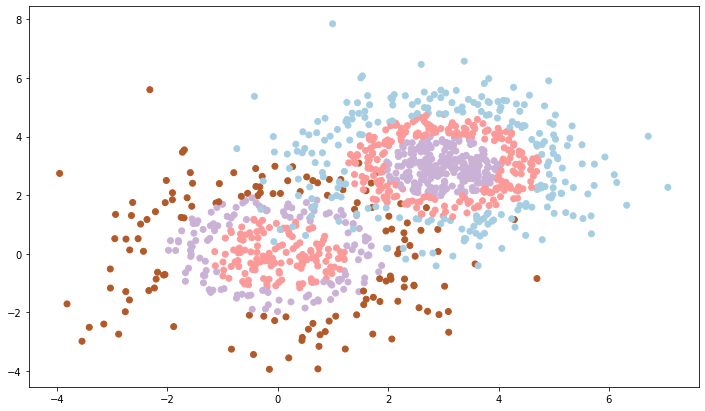

In [51]:
X1, y1 = make_gaussian_quantiles(cov = 2, n_samples=400, n_features=2, n_classes = 3, random_state=1)
X2, y2 = make_gaussian_quantiles(mean=(3, 3), cov=1.5, n_samples=700, n_features=2, n_classes=3, random_state=1)   

X = np.concatenate((X1, X2))
y = np.concatenate((y1, -y2 + 1))
y = y + 1
plt.figure(figsize = (12,7))
plt.scatter(X[:,0], X[:,1], c = y, cmap = plt.cm.Paired)
plt.show()

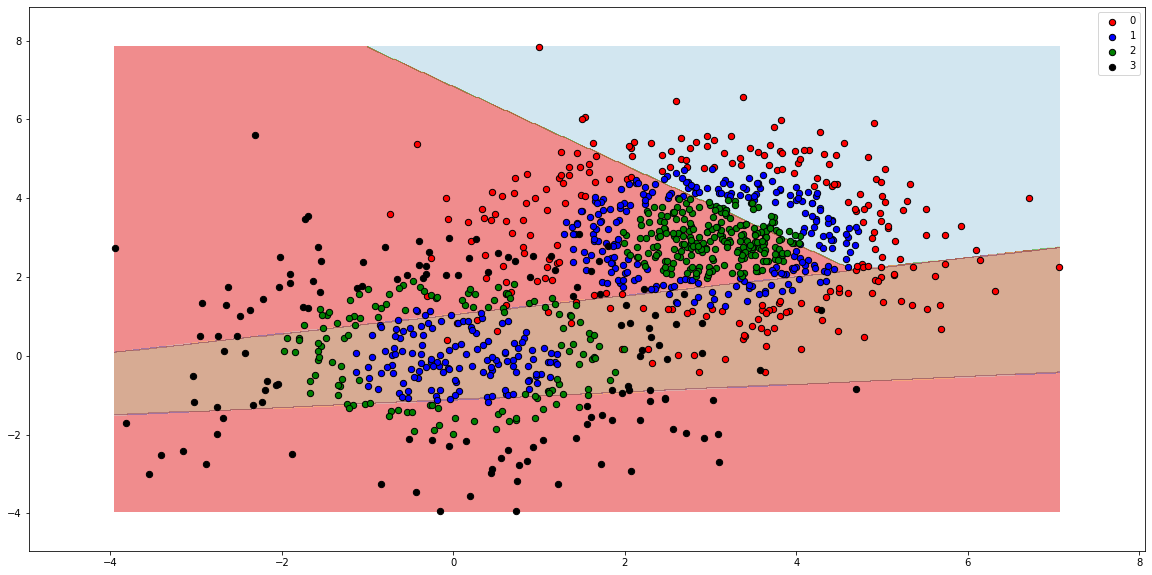

In [52]:
mod_svm_lin = SVC(max_iter = 100000, kernel = 'poly', degree = 1)
mod_svm_lin.fit(X,y)

classes = 4 
colors = 'rbgk'
class_names = '0123'
Decision_Boundary(mod_svm_lin,X,y,n_points=500, n_classes = classes, colors = colors, class_names = class_names)

In [53]:
mod_svm_lin.score(X,y)

0.25727272727272726

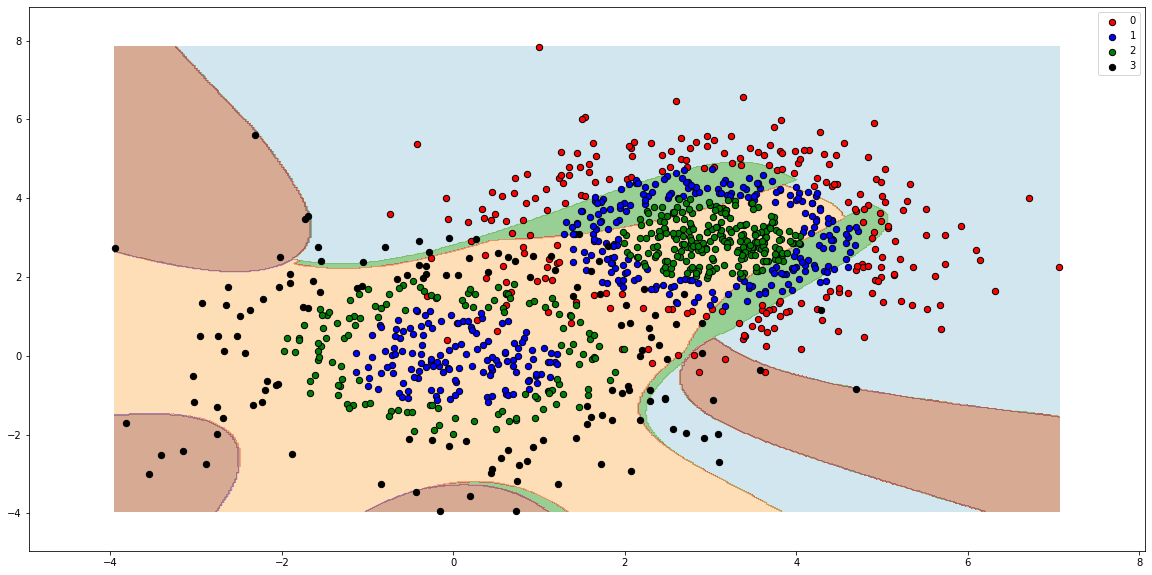

In [58]:
mod_svm_poly = SVC(kernel = "poly", degree = 5)
mod_svm_poly.fit(X,y)

classes = 4 
colors = 'rbgk'
class_names = '0123'
Decision_Boundary(mod_svm_poly,X,y,n_points=500, n_classes = classes, colors = colors, class_names = class_names)

In [59]:
mod_svm_poly.score(X,y)

0.6018181818181818

In [62]:
np.linspace(0.00001, 2, 10)

array([1.00000000e-05, 2.22231111e-01, 4.44452222e-01, 6.66673333e-01,
       8.88894444e-01, 1.11111556e+00, 1.33333667e+00, 1.55555778e+00,
       1.77777889e+00, 2.00000000e+00])

In [69]:
mod_svm_radial = SVC(kernel = "rbf")
param_grid = {'gamma': np.linspace(0.00001, 10, 1000)}

model_optimal = GridSearchCV(mod_svm_radial, param_grid = param_grid, cv = 5)
model_optimal.fit(X,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'gamma': array([1.00000e-05, 1.00200e-02, 2....
       9.75976e+00, 9.76977e+00, 9.77978e+00, 9.78979e+00, 9.79980e+00,
       9.80981e+00, 9.81982e+00, 9.82983e+00, 9.83984e+00, 9.84985e+00,
       9.85986e+00, 9.86987e+00, 9.87988e+00, 9.88989e+00, 9.89990e+00,
       9.90991e+00, 9.91992e+00, 9.92993e+00, 9.93994e+00, 9.94995e+00,
       9.95996e+00, 9.96997e+00, 9.97998e+00, 9.98999e+00, 1.00000e+01])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
           

In [71]:
model_optimal.best_params_

{'gamma': 3.83384}

In [72]:
model_optimal.best_estimator_.score(X,y)

0.9463636363636364

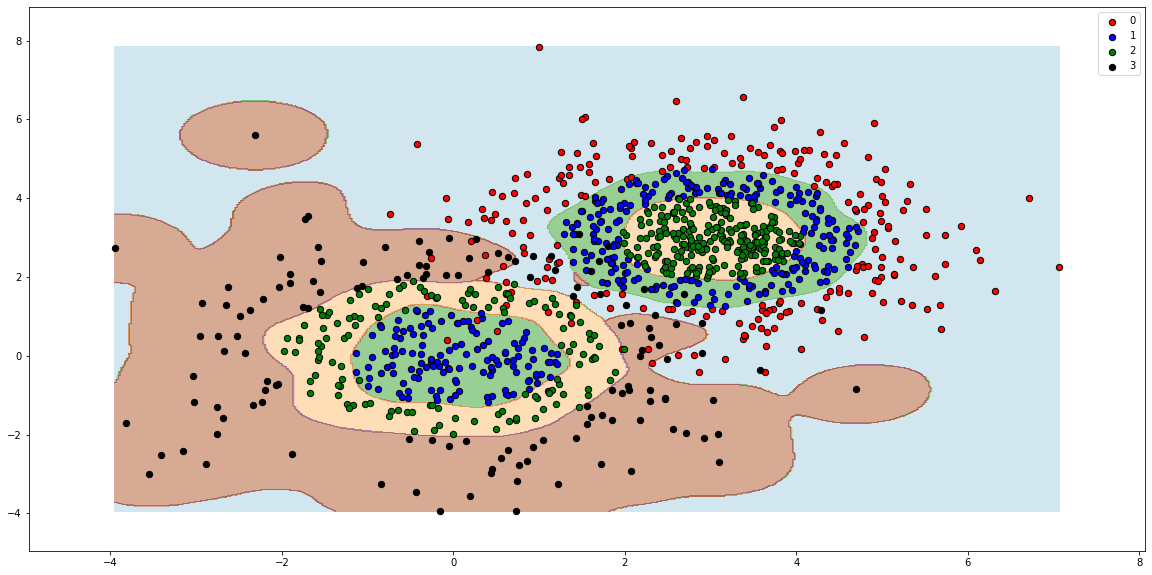

In [73]:
classes = 4 
colors = 'rbgk'
class_names = '0123'
Decision_Boundary(model_optimal,X,y,n_points=500, n_classes = classes, colors = colors, class_names = class_names)

In [61]:
mod_svm_radial.score(X,y)

0.8418181818181818

In [29]:
y_predict = mod_svm_radial.predict(X)
print(classification_report(y,y_predict))

              precision    recall  f1-score   support

           0       0.84      0.85      0.84       234
           1       0.81      0.88      0.84       366
           2       0.85      0.86      0.86       366
           3       0.94      0.67      0.78       134

    accuracy                           0.84      1100
   macro avg       0.86      0.82      0.83      1100
weighted avg       0.85      0.84      0.84      1100



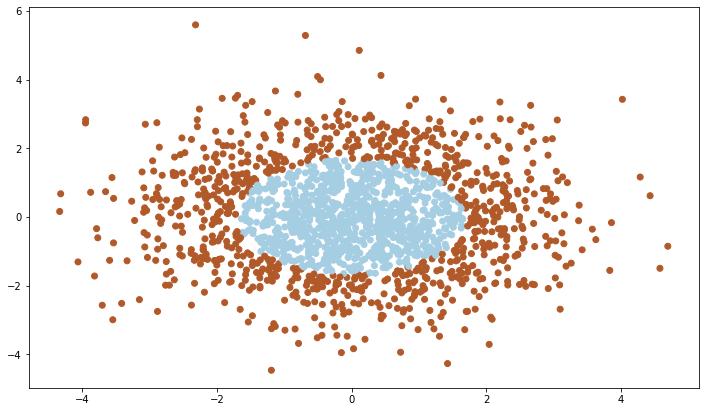

In [35]:
X, y = make_gaussian_quantiles(cov = 2, n_samples = 1800, n_features=2, n_classes = 2, random_state=1)

plt.figure(figsize = (12,7))
plt.scatter(X[:,0], X[:,1], c = y, cmap = plt.cm.Paired)
plt.show()

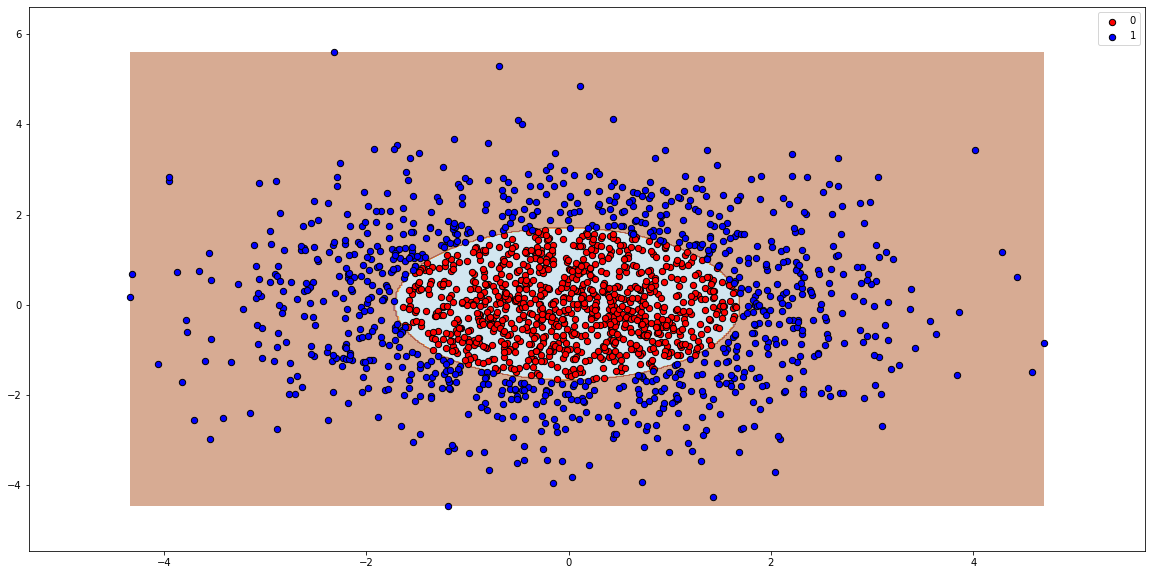

In [40]:
mod_svm_radial = svm.SVC(kernel = "rbf")
mod_svm_radial.fit(X,y)

classes = 2
colors = 'rb'
class_names = '01'
Decision_Boundary(mod_svm_radial,X,y, n_points=500, n_classes = classes, colors = colors, class_names = class_names)

In [41]:
y_predict = mod_svm_radial.predict(X)
print(classification_report(y,y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       900
           1       1.00      1.00      1.00       900

    accuracy                           1.00      1800
   macro avg       1.00      1.00      1.00      1800
weighted avg       1.00      1.00      1.00      1800



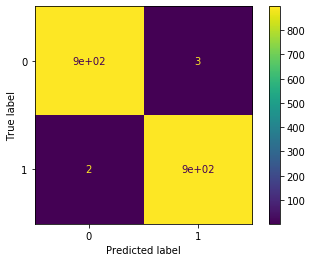

In [42]:
plot_confusion_matrix(mod_svm_radial,X,y)

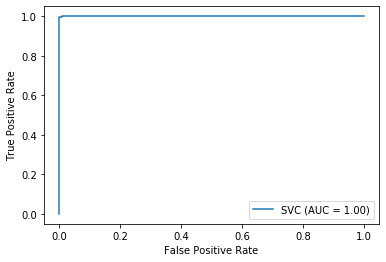

In [43]:
plot_roc_curve(mod_svm_radial,X,y)

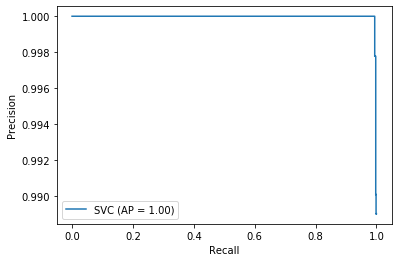

In [44]:
plot_precision_recall_curve(mod_svm_radial,X,y)

In [45]:
twoclass_output = mod_svm_radial.decision_function(X)
twoclass_output

array([-1.91998817, -1.49854375, -0.15018478, ...,  3.56922171,
        1.73226614, -3.36552039])

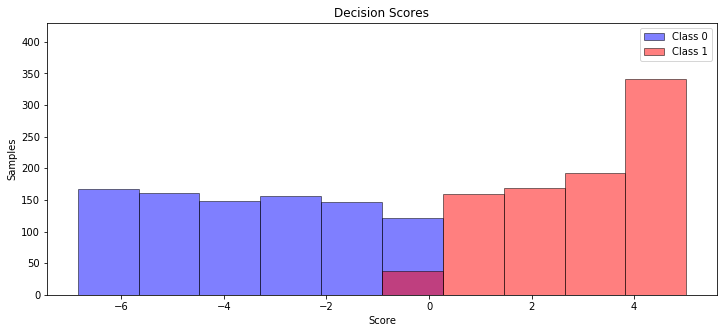

In [47]:
plot_colors = "br"
class_names = "01"

plot_range = (twoclass_output.min(), twoclass_output.max())

plt.figure(figsize = (12,5))
for label, cl, color in zip(range(2), class_names, plot_colors):
    plt.hist(twoclass_output[y == label], bins = 10, range = plot_range,
             facecolor = color, label = 'Class %s' % cl, alpha=.5, edgecolor='k')
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, y1, y2 * 1.2))
plt.legend(loc='upper right')
plt.ylabel('Samples')
plt.xlabel('Score')
plt.title('Decision Scores')
plt.show()

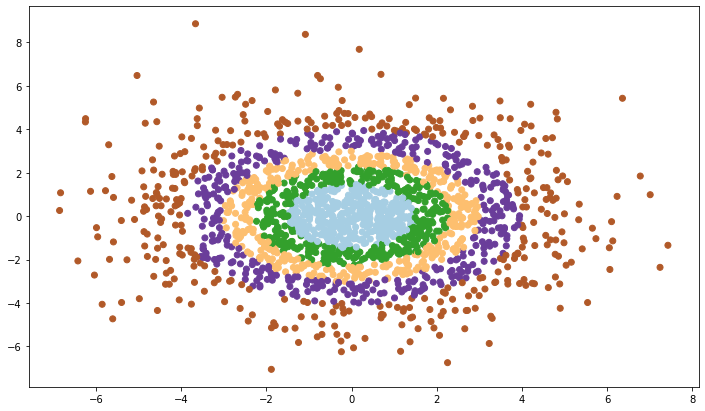

In [12]:
X1, y1 = make_gaussian_quantiles(cov = 5, n_samples = 2000, n_features = 2, n_classes = 5, random_state=1)
plt.figure(figsize = (12,7))
plt.scatter(X1[:,0], X1[:,1], c = y1, cmap = plt.cm.Paired)
plt.show()

In [55]:
gamma_grid = np.linspace(0.0001, 1, 100)
mod_svm_radial = svm.SVC(kernel = "rbf")
model_optimal = GridSearchCV(mod_svm_radial, param_grid = {'gamma':gamma_grid})
model_optimal.fit(X1,y1)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'gamma': array([1.000e-04, 1.020e-02, 2.0...
       7.273e-01, 7.374e-01, 7.475e-01, 7.576e-01, 7.677e-01, 7.778e-01,
       7.879e-01, 7.980e-01, 8.081e-01, 8.182e-01, 8.283e-01, 8.384e-01,
       8.485e-01, 8.586e-01, 8.687e-01, 8.788e-01, 8.889e-01, 8.990e-01,
       9.091e-01, 9.192e-01, 9.293e-01, 9.394e-01, 9.495e-01, 9.596e-01,
       9.697e-01, 9.798e-01, 9.899e-01, 1.000e+00])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, v

In [56]:
model_optimal.best_estimator_

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0506, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [57]:
model_optimal.best_params_

{'gamma': 0.0506}

In [58]:
y1_predict = model_optimal.best_estimator_.predict(X1)
print(accuracy_score(y1, y1_predict))

0.9655


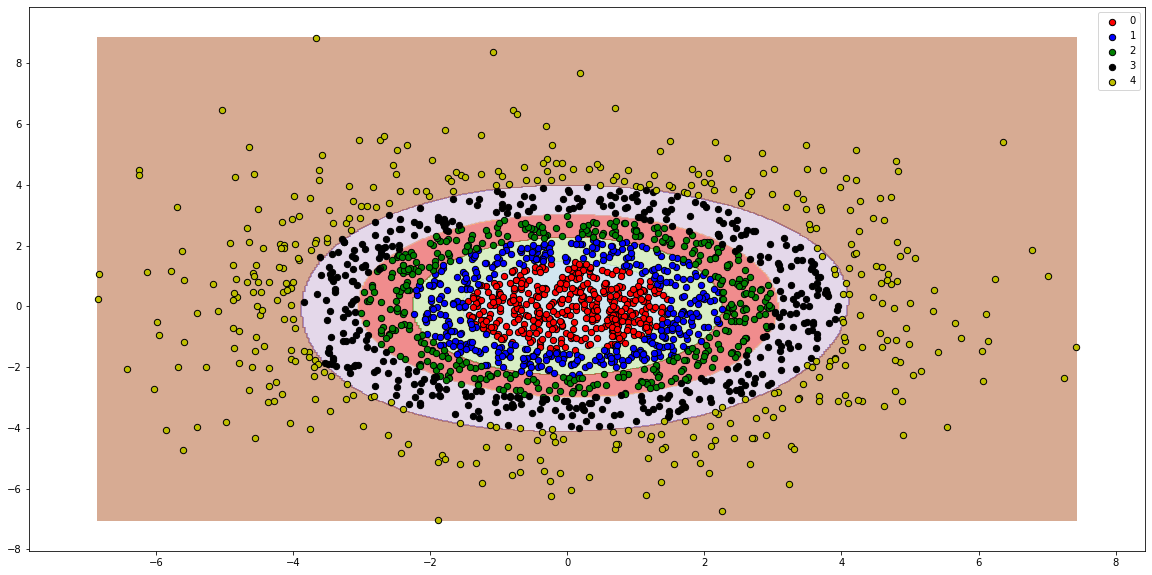

In [59]:
classes = 5
colors = 'rbgky'
class_names = '01234'
Decision_Boundary(model_optimal.best_estimator_,X1,y1, n_points=500, n_classes = classes, colors = colors, class_names = class_names)

In [94]:
X_multi, y_multi = make_gaussian_quantiles(cov = 5, n_features = 12, 
                                           n_samples = 2000, n_classes = 5, random_state = 1)
gamma_grid = np.linspace(0.0001, 1, 100)
mod_svm_radial = svm.SVC(kernel = "rbf")
model_optimal = GridSearchCV(mod_svm_radial, param_grid = {'gamma':gamma_grid}, cv = 10)
model_optimal.fit(X_multi,y_multi)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'gamma': array([1.000e-04, 1.020e-02, 2.030...
       7.273e-01, 7.374e-01, 7.475e-01, 7.576e-01, 7.677e-01, 7.778e-01,
       7.879e-01, 7.980e-01, 8.081e-01, 8.182e-01, 8.283e-01, 8.384e-01,
       8.485e-01, 8.586e-01, 8.687e-01, 8.788e-01, 8.889e-01, 8.990e-01,
       9.091e-01, 9.192e-01, 9.293e-01, 9.394e-01, 9.495e-01, 9.596e-01,
       9.697e-01, 9.798e-01, 9.899e-01, 1.000e+00])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, v

In [97]:
model_optimal.best_params_

{'gamma': 0.010199999999999999}

In [98]:
y_multi_predict = model_optimal.best_estimator_.predict(X_multi)
print(accuracy_score(y_multi, y_multi_predict))

0.939


In [76]:
np.floor(np.linspace(10,10000,20))

array([   10.,   535.,  1061.,  1587.,  2113.,  2638.,  3164.,  3690.,
        4216.,  4742.,  5267.,  5793.,  6319.,  6845.,  7371.,  7896.,
        8422.,  8948.,  9474., 10000.])

# Regression

In [83]:
param_grid = {'n_estimators' : [10, 50, 100, 200, 500, 1000, 1500, 2000], 'base_estimator__max_depth': [1,2,3,4]}
mod_boost = AdaBoostRegressor(base_estimator = DecisionTreeRegressor(), random_state = 11)

model_optimal = GridSearchCV(mod_boost, param_grid = param_grid, cv = 3, verbose = 2)
model_optimal.fit(X2,y2)

Fitting 3 folds for each of 32 candidates, totalling 96 fits
[CV] base_estimator__max_depth=1, n_estimators=10 ....................
[CV] ..... base_estimator__max_depth=1, n_estimators=10, total=   0.0s
[CV] base_estimator__max_depth=1, n_estimators=10 ....................
[CV] ..... base_estimator__max_depth=1, n_estimators=10, total=   0.0s
[CV] base_estimator__max_depth=1, n_estimators=10 ....................
[CV] ..... base_estimator__max_depth=1, n_estimators=10, total=   0.0s
[CV] base_estimator__max_depth=1, n_estimators=50 ....................
[CV] ..... base_estimator__max_depth=1, n_estimators=50, total=   0.0s
[CV] base_estimator__max_depth=1, n_estimators=50 ....................
[CV] ..... base_estimator__max_depth=1, n_estimators=50, total=   0.0s
[CV] base_estimator__max_depth=1, n_estimators=50 ....................
[CV] ..... base_estimator__max_depth=1, n_estimators=50, total=   0.0s
[CV] base_estimator__max_depth=1, n_estimators=100 ...................
[CV] .... base_e

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ..... base_estimator__max_depth=2, n_estimators=50, total=   0.0s
[CV] base_estimator__max_depth=2, n_estimators=100 ...................
[CV] .... base_estimator__max_depth=2, n_estimators=100, total=   0.0s
[CV] base_estimator__max_depth=2, n_estimators=100 ...................
[CV] .... base_estimator__max_depth=2, n_estimators=100, total=   0.0s
[CV] base_estimator__max_depth=2, n_estimators=100 ...................
[CV] .... base_estimator__max_depth=2, n_estimators=100, total=   0.0s
[CV] base_estimator__max_depth=2, n_estimators=200 ...................
[CV] .... base_estimator__max_depth=2, n_estimators=200, total=   0.0s
[CV] base_estimator__max_depth=2, n_estimators=200 ...................
[CV] .... base_estimator__max_depth=2, n_estimators=200, total=   0.0s
[CV] base_estimator__max_depth=2, n_estimators=200 ...................
[CV] .... base_estimator__max_depth=2, n_estimators=200, total=   0.0s
[CV] base_estimator__max_depth=2, n_estimators=500 ...................
[CV] .

[CV] ... base_estimator__max_depth=4, n_estimators=1000, total=   1.0s
[CV] base_estimator__max_depth=4, n_estimators=1000 ..................
[CV] ... base_estimator__max_depth=4, n_estimators=1000, total=   1.1s
[CV] base_estimator__max_depth=4, n_estimators=1000 ..................
[CV] ... base_estimator__max_depth=4, n_estimators=1000, total=   1.2s
[CV] base_estimator__max_depth=4, n_estimators=1500 ..................
[CV] ... base_estimator__max_depth=4, n_estimators=1500, total=   2.0s
[CV] base_estimator__max_depth=4, n_estimators=1500 ..................
[CV] ... base_estimator__max_depth=4, n_estimators=1500, total=   2.0s
[CV] base_estimator__max_depth=4, n_estimators=1500 ..................
[CV] ... base_estimator__max_depth=4, n_estimators=1500, total=   1.6s
[CV] base_estimator__max_depth=4, n_estimators=2000 ..................
[CV] ... base_estimator__max_depth=4, n_estimators=2000, total=   2.4s
[CV] base_estimator__max_depth=4, n_estimators=2000 ..................
[CV] .

[Parallel(n_jobs=1)]: Done  96 out of  96 | elapsed:   33.7s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                                              criterion='mse',
                                                                              max_depth=None,
                                                                              max_features=None,
                                                                              max_leaf_nodes=None,
                                                                              min_impurity_decrease=0.0,
                                                                              min_impurity_split=None,
                                                                              min_samples_leaf=1,
                                                                              min_samples_split=2,
                                                                              min

In [84]:
model_optimal.best_params_

{'base_estimator__max_depth': 4, 'n_estimators': 50}

In [85]:
model_optimal.best_estimator_.score(X2,y2)

0.8722975283442989

In [19]:
X2, y2 = make_regression(n_samples = 2000, n_features = 15, n_informative = 5, noise = 50, bias = 1)

In [25]:
d_grid = np.array([1,2,3,4])
C_grid = np.linspace(0.1, 100, 10)
epsilon = np.linspace(0,1,10)

mod_svm = SVR(kernel = "poly")

model_optimal = GridSearchCV(mod_svm, 
                             param_grid = {'degree': d_grid, 'C': C_grid, 'epsilon': epsilon}, 
                             cv = 3,
                            verbose = 2)
model_optimal.fit(X2,y2)

Fitting 3 folds for each of 400 candidates, totalling 1200 fits
[CV] C=0.1, degree=1, epsilon=0.0 ....................................
[CV] ..................... C=0.1, degree=1, epsilon=0.0, total=   0.1s
[CV] C=0.1, degree=1, epsilon=0.0 ....................................
[CV] ..................... C=0.1, degree=1, epsilon=0.0, total=   0.1s
[CV] C=0.1, degree=1, epsilon=0.0 ....................................
[CV] ..................... C=0.1, degree=1, epsilon=0.0, total=   0.1s
[CV] C=0.1, degree=1, epsilon=0.1111111111111111 .....................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ...... C=0.1, degree=1, epsilon=0.1111111111111111, total=   0.1s
[CV] C=0.1, degree=1, epsilon=0.1111111111111111 .....................
[CV] ...... C=0.1, degree=1, epsilon=0.1111111111111111, total=   0.1s
[CV] C=0.1, degree=1, epsilon=0.1111111111111111 .....................
[CV] ...... C=0.1, degree=1, epsilon=0.1111111111111111, total=   0.1s
[CV] C=0.1, degree=1, epsilon=0.2222222222222222 .....................
[CV] ...... C=0.1, degree=1, epsilon=0.2222222222222222, total=   0.1s
[CV] C=0.1, degree=1, epsilon=0.2222222222222222 .....................
[CV] ...... C=0.1, degree=1, epsilon=0.2222222222222222, total=   0.1s
[CV] C=0.1, degree=1, epsilon=0.2222222222222222 .....................
[CV] ...... C=0.1, degree=1, epsilon=0.2222222222222222, total=   0.1s
[CV] C=0.1, degree=1, epsilon=0.3333333333333333 .....................
[CV] ...... C=0.1, degree=1, epsilon=0.3333333333333333, total=   0.1s
[CV] C=0.1, degree=1, epsilon=0.3333333333333333 .....................
[CV] .

[CV] ..................... C=0.1, degree=3, epsilon=0.0, total=   0.1s
[CV] C=0.1, degree=3, epsilon=0.1111111111111111 .....................
[CV] ...... C=0.1, degree=3, epsilon=0.1111111111111111, total=   0.1s
[CV] C=0.1, degree=3, epsilon=0.1111111111111111 .....................
[CV] ...... C=0.1, degree=3, epsilon=0.1111111111111111, total=   0.1s
[CV] C=0.1, degree=3, epsilon=0.1111111111111111 .....................
[CV] ...... C=0.1, degree=3, epsilon=0.1111111111111111, total=   0.1s
[CV] C=0.1, degree=3, epsilon=0.2222222222222222 .....................
[CV] ...... C=0.1, degree=3, epsilon=0.2222222222222222, total=   0.1s
[CV] C=0.1, degree=3, epsilon=0.2222222222222222 .....................
[CV] ...... C=0.1, degree=3, epsilon=0.2222222222222222, total=   0.1s
[CV] C=0.1, degree=3, epsilon=0.2222222222222222 .....................
[CV] ...... C=0.1, degree=3, epsilon=0.2222222222222222, total=   0.1s
[CV] C=0.1, degree=3, epsilon=0.3333333333333333 .....................
[CV] .

[CV] ...... C=11.200000000000001, degree=1, epsilon=0.0, total=   0.1s
[CV] C=11.200000000000001, degree=1, epsilon=0.0 .....................
[CV] ...... C=11.200000000000001, degree=1, epsilon=0.0, total=   0.1s
[CV] C=11.200000000000001, degree=1, epsilon=0.0 .....................
[CV] ...... C=11.200000000000001, degree=1, epsilon=0.0, total=   0.1s
[CV] C=11.200000000000001, degree=1, epsilon=0.1111111111111111 ......
[CV]  C=11.200000000000001, degree=1, epsilon=0.1111111111111111, total=   0.1s
[CV] C=11.200000000000001, degree=1, epsilon=0.1111111111111111 ......
[CV]  C=11.200000000000001, degree=1, epsilon=0.1111111111111111, total=   0.1s
[CV] C=11.200000000000001, degree=1, epsilon=0.1111111111111111 ......
[CV]  C=11.200000000000001, degree=1, epsilon=0.1111111111111111, total=   0.1s
[CV] C=11.200000000000001, degree=1, epsilon=0.2222222222222222 ......
[CV]  C=11.200000000000001, degree=1, epsilon=0.2222222222222222, total=   0.1s
[CV] C=11.200000000000001, degree=1, epsi

[CV] ...... C=11.200000000000001, degree=2, epsilon=1.0, total=   0.1s
[CV] C=11.200000000000001, degree=2, epsilon=1.0 .....................
[CV] ...... C=11.200000000000001, degree=2, epsilon=1.0, total=   0.1s
[CV] C=11.200000000000001, degree=2, epsilon=1.0 .....................
[CV] ...... C=11.200000000000001, degree=2, epsilon=1.0, total=   0.1s
[CV] C=11.200000000000001, degree=3, epsilon=0.0 .....................
[CV] ...... C=11.200000000000001, degree=3, epsilon=0.0, total=   0.1s
[CV] C=11.200000000000001, degree=3, epsilon=0.0 .....................
[CV] ...... C=11.200000000000001, degree=3, epsilon=0.0, total=   0.1s
[CV] C=11.200000000000001, degree=3, epsilon=0.0 .....................
[CV] ...... C=11.200000000000001, degree=3, epsilon=0.0, total=   0.1s
[CV] C=11.200000000000001, degree=3, epsilon=0.1111111111111111 ......
[CV]  C=11.200000000000001, degree=3, epsilon=0.1111111111111111, total=   0.1s
[CV] C=11.200000000000001, degree=3, epsilon=0.1111111111111111 ....

[CV]  C=11.200000000000001, degree=4, epsilon=0.8888888888888888, total=   0.1s
[CV] C=11.200000000000001, degree=4, epsilon=0.8888888888888888 ......
[CV]  C=11.200000000000001, degree=4, epsilon=0.8888888888888888, total=   0.1s
[CV] C=11.200000000000001, degree=4, epsilon=0.8888888888888888 ......
[CV]  C=11.200000000000001, degree=4, epsilon=0.8888888888888888, total=   0.1s
[CV] C=11.200000000000001, degree=4, epsilon=1.0 .....................
[CV] ...... C=11.200000000000001, degree=4, epsilon=1.0, total=   0.1s
[CV] C=11.200000000000001, degree=4, epsilon=1.0 .....................
[CV] ...... C=11.200000000000001, degree=4, epsilon=1.0, total=   0.1s
[CV] C=11.200000000000001, degree=4, epsilon=1.0 .....................
[CV] ...... C=11.200000000000001, degree=4, epsilon=1.0, total=   0.1s
[CV] C=22.300000000000004, degree=1, epsilon=0.0 .....................
[CV] ...... C=22.300000000000004, degree=1, epsilon=0.0, total=   0.1s
[CV] C=22.300000000000004, degree=1, epsilon=0.0 .

[CV]  C=22.300000000000004, degree=2, epsilon=0.7777777777777777, total=   0.1s
[CV] C=22.300000000000004, degree=2, epsilon=0.7777777777777777 ......
[CV]  C=22.300000000000004, degree=2, epsilon=0.7777777777777777, total=   0.1s
[CV] C=22.300000000000004, degree=2, epsilon=0.7777777777777777 ......
[CV]  C=22.300000000000004, degree=2, epsilon=0.7777777777777777, total=   0.1s
[CV] C=22.300000000000004, degree=2, epsilon=0.8888888888888888 ......
[CV]  C=22.300000000000004, degree=2, epsilon=0.8888888888888888, total=   0.1s
[CV] C=22.300000000000004, degree=2, epsilon=0.8888888888888888 ......
[CV]  C=22.300000000000004, degree=2, epsilon=0.8888888888888888, total=   0.1s
[CV] C=22.300000000000004, degree=2, epsilon=0.8888888888888888 ......
[CV]  C=22.300000000000004, degree=2, epsilon=0.8888888888888888, total=   0.1s
[CV] C=22.300000000000004, degree=2, epsilon=1.0 .....................
[CV] ...... C=22.300000000000004, degree=2, epsilon=1.0, total=   0.1s
[CV] C=22.3000000000000

[CV]  C=22.300000000000004, degree=4, epsilon=0.6666666666666666, total=   0.1s
[CV] C=22.300000000000004, degree=4, epsilon=0.6666666666666666 ......
[CV]  C=22.300000000000004, degree=4, epsilon=0.6666666666666666, total=   0.1s
[CV] C=22.300000000000004, degree=4, epsilon=0.6666666666666666 ......
[CV]  C=22.300000000000004, degree=4, epsilon=0.6666666666666666, total=   0.1s
[CV] C=22.300000000000004, degree=4, epsilon=0.7777777777777777 ......
[CV]  C=22.300000000000004, degree=4, epsilon=0.7777777777777777, total=   0.1s
[CV] C=22.300000000000004, degree=4, epsilon=0.7777777777777777 ......
[CV]  C=22.300000000000004, degree=4, epsilon=0.7777777777777777, total=   0.1s
[CV] C=22.300000000000004, degree=4, epsilon=0.7777777777777777 ......
[CV]  C=22.300000000000004, degree=4, epsilon=0.7777777777777777, total=   0.1s
[CV] C=22.300000000000004, degree=4, epsilon=0.8888888888888888 ......
[CV]  C=22.300000000000004, degree=4, epsilon=0.8888888888888888, total=   0.1s
[CV] C=22.3000

[CV]  C=33.400000000000006, degree=2, epsilon=0.5555555555555556, total=   0.1s
[CV] C=33.400000000000006, degree=2, epsilon=0.5555555555555556 ......
[CV]  C=33.400000000000006, degree=2, epsilon=0.5555555555555556, total=   0.1s
[CV] C=33.400000000000006, degree=2, epsilon=0.5555555555555556 ......
[CV]  C=33.400000000000006, degree=2, epsilon=0.5555555555555556, total=   0.1s
[CV] C=33.400000000000006, degree=2, epsilon=0.6666666666666666 ......
[CV]  C=33.400000000000006, degree=2, epsilon=0.6666666666666666, total=   0.1s
[CV] C=33.400000000000006, degree=2, epsilon=0.6666666666666666 ......
[CV]  C=33.400000000000006, degree=2, epsilon=0.6666666666666666, total=   0.1s
[CV] C=33.400000000000006, degree=2, epsilon=0.6666666666666666 ......
[CV]  C=33.400000000000006, degree=2, epsilon=0.6666666666666666, total=   0.1s
[CV] C=33.400000000000006, degree=2, epsilon=0.7777777777777777 ......
[CV]  C=33.400000000000006, degree=2, epsilon=0.7777777777777777, total=   0.1s
[CV] C=33.4000

[CV]  C=33.400000000000006, degree=4, epsilon=0.3333333333333333, total=   0.1s
[CV] C=33.400000000000006, degree=4, epsilon=0.4444444444444444 ......
[CV]  C=33.400000000000006, degree=4, epsilon=0.4444444444444444, total=   0.1s
[CV] C=33.400000000000006, degree=4, epsilon=0.4444444444444444 ......
[CV]  C=33.400000000000006, degree=4, epsilon=0.4444444444444444, total=   0.1s
[CV] C=33.400000000000006, degree=4, epsilon=0.4444444444444444 ......
[CV]  C=33.400000000000006, degree=4, epsilon=0.4444444444444444, total=   0.1s
[CV] C=33.400000000000006, degree=4, epsilon=0.5555555555555556 ......
[CV]  C=33.400000000000006, degree=4, epsilon=0.5555555555555556, total=   0.1s
[CV] C=33.400000000000006, degree=4, epsilon=0.5555555555555556 ......
[CV]  C=33.400000000000006, degree=4, epsilon=0.5555555555555556, total=   0.1s
[CV] C=33.400000000000006, degree=4, epsilon=0.5555555555555556 ......
[CV]  C=33.400000000000006, degree=4, epsilon=0.5555555555555556, total=   0.1s
[CV] C=33.4000

[CV]  C=44.50000000000001, degree=2, epsilon=0.2222222222222222, total=   0.1s
[CV] C=44.50000000000001, degree=2, epsilon=0.3333333333333333 .......
[CV]  C=44.50000000000001, degree=2, epsilon=0.3333333333333333, total=   0.1s
[CV] C=44.50000000000001, degree=2, epsilon=0.3333333333333333 .......
[CV]  C=44.50000000000001, degree=2, epsilon=0.3333333333333333, total=   0.1s
[CV] C=44.50000000000001, degree=2, epsilon=0.3333333333333333 .......
[CV]  C=44.50000000000001, degree=2, epsilon=0.3333333333333333, total=   0.1s
[CV] C=44.50000000000001, degree=2, epsilon=0.4444444444444444 .......
[CV]  C=44.50000000000001, degree=2, epsilon=0.4444444444444444, total=   0.1s
[CV] C=44.50000000000001, degree=2, epsilon=0.4444444444444444 .......
[CV]  C=44.50000000000001, degree=2, epsilon=0.4444444444444444, total=   0.1s
[CV] C=44.50000000000001, degree=2, epsilon=0.4444444444444444 .......
[CV]  C=44.50000000000001, degree=2, epsilon=0.4444444444444444, total=   0.1s
[CV] C=44.50000000000

[CV]  C=44.50000000000001, degree=4, epsilon=0.1111111111111111, total=   0.1s
[CV] C=44.50000000000001, degree=4, epsilon=0.1111111111111111 .......
[CV]  C=44.50000000000001, degree=4, epsilon=0.1111111111111111, total=   0.1s
[CV] C=44.50000000000001, degree=4, epsilon=0.2222222222222222 .......
[CV]  C=44.50000000000001, degree=4, epsilon=0.2222222222222222, total=   0.1s
[CV] C=44.50000000000001, degree=4, epsilon=0.2222222222222222 .......
[CV]  C=44.50000000000001, degree=4, epsilon=0.2222222222222222, total=   0.1s
[CV] C=44.50000000000001, degree=4, epsilon=0.2222222222222222 .......
[CV]  C=44.50000000000001, degree=4, epsilon=0.2222222222222222, total=   0.1s
[CV] C=44.50000000000001, degree=4, epsilon=0.3333333333333333 .......
[CV]  C=44.50000000000001, degree=4, epsilon=0.3333333333333333, total=   0.1s
[CV] C=44.50000000000001, degree=4, epsilon=0.3333333333333333 .......
[CV]  C=44.50000000000001, degree=4, epsilon=0.3333333333333333, total=   0.1s
[CV] C=44.50000000000

[CV] ....... C=55.60000000000001, degree=2, epsilon=0.0, total=   0.1s
[CV] C=55.60000000000001, degree=2, epsilon=0.0 ......................
[CV] ....... C=55.60000000000001, degree=2, epsilon=0.0, total=   0.1s
[CV] C=55.60000000000001, degree=2, epsilon=0.1111111111111111 .......
[CV]  C=55.60000000000001, degree=2, epsilon=0.1111111111111111, total=   0.1s
[CV] C=55.60000000000001, degree=2, epsilon=0.1111111111111111 .......
[CV]  C=55.60000000000001, degree=2, epsilon=0.1111111111111111, total=   0.1s
[CV] C=55.60000000000001, degree=2, epsilon=0.1111111111111111 .......
[CV]  C=55.60000000000001, degree=2, epsilon=0.1111111111111111, total=   0.1s
[CV] C=55.60000000000001, degree=2, epsilon=0.2222222222222222 .......
[CV]  C=55.60000000000001, degree=2, epsilon=0.2222222222222222, total=   0.1s
[CV] C=55.60000000000001, degree=2, epsilon=0.2222222222222222 .......
[CV]  C=55.60000000000001, degree=2, epsilon=0.2222222222222222, total=   0.1s
[CV] C=55.60000000000001, degree=2, e

[CV] ....... C=55.60000000000001, degree=3, epsilon=1.0, total=   0.2s
[CV] C=55.60000000000001, degree=3, epsilon=1.0 ......................
[CV] ....... C=55.60000000000001, degree=3, epsilon=1.0, total=   0.1s
[CV] C=55.60000000000001, degree=4, epsilon=0.0 ......................
[CV] ....... C=55.60000000000001, degree=4, epsilon=0.0, total=   0.1s
[CV] C=55.60000000000001, degree=4, epsilon=0.0 ......................
[CV] ....... C=55.60000000000001, degree=4, epsilon=0.0, total=   0.1s
[CV] C=55.60000000000001, degree=4, epsilon=0.0 ......................
[CV] ....... C=55.60000000000001, degree=4, epsilon=0.0, total=   0.1s
[CV] C=55.60000000000001, degree=4, epsilon=0.1111111111111111 .......
[CV]  C=55.60000000000001, degree=4, epsilon=0.1111111111111111, total=   0.1s
[CV] C=55.60000000000001, degree=4, epsilon=0.1111111111111111 .......
[CV]  C=55.60000000000001, degree=4, epsilon=0.1111111111111111, total=   0.1s
[CV] C=55.60000000000001, degree=4, epsilon=0.111111111111111

[CV] .................... C=66.7, degree=1, epsilon=1.0, total=   0.1s
[CV] C=66.7, degree=1, epsilon=1.0 ...................................
[CV] .................... C=66.7, degree=1, epsilon=1.0, total=   0.1s
[CV] C=66.7, degree=1, epsilon=1.0 ...................................
[CV] .................... C=66.7, degree=1, epsilon=1.0, total=   0.1s
[CV] C=66.7, degree=2, epsilon=0.0 ...................................
[CV] .................... C=66.7, degree=2, epsilon=0.0, total=   0.1s
[CV] C=66.7, degree=2, epsilon=0.0 ...................................
[CV] .................... C=66.7, degree=2, epsilon=0.0, total=   0.1s
[CV] C=66.7, degree=2, epsilon=0.0 ...................................
[CV] .................... C=66.7, degree=2, epsilon=0.0, total=   0.1s
[CV] C=66.7, degree=2, epsilon=0.1111111111111111 ....................
[CV] ..... C=66.7, degree=2, epsilon=0.1111111111111111, total=   0.1s
[CV] C=66.7, degree=2, epsilon=0.1111111111111111 ....................
[CV] .

[CV] ..... C=66.7, degree=3, epsilon=0.8888888888888888, total=   0.2s
[CV] C=66.7, degree=3, epsilon=1.0 ...................................
[CV] .................... C=66.7, degree=3, epsilon=1.0, total=   0.1s
[CV] C=66.7, degree=3, epsilon=1.0 ...................................
[CV] .................... C=66.7, degree=3, epsilon=1.0, total=   0.2s
[CV] C=66.7, degree=3, epsilon=1.0 ...................................
[CV] .................... C=66.7, degree=3, epsilon=1.0, total=   0.2s
[CV] C=66.7, degree=4, epsilon=0.0 ...................................
[CV] .................... C=66.7, degree=4, epsilon=0.0, total=   0.1s
[CV] C=66.7, degree=4, epsilon=0.0 ...................................
[CV] .................... C=66.7, degree=4, epsilon=0.0, total=   0.1s
[CV] C=66.7, degree=4, epsilon=0.0 ...................................
[CV] .................... C=66.7, degree=4, epsilon=0.0, total=   0.1s
[CV] C=66.7, degree=4, epsilon=0.1111111111111111 ....................
[CV] .

[CV]  C=77.80000000000001, degree=1, epsilon=0.8888888888888888, total=   0.1s
[CV] C=77.80000000000001, degree=1, epsilon=0.8888888888888888 .......
[CV]  C=77.80000000000001, degree=1, epsilon=0.8888888888888888, total=   0.1s
[CV] C=77.80000000000001, degree=1, epsilon=0.8888888888888888 .......
[CV]  C=77.80000000000001, degree=1, epsilon=0.8888888888888888, total=   0.1s
[CV] C=77.80000000000001, degree=1, epsilon=1.0 ......................
[CV] ....... C=77.80000000000001, degree=1, epsilon=1.0, total=   0.1s
[CV] C=77.80000000000001, degree=1, epsilon=1.0 ......................
[CV] ....... C=77.80000000000001, degree=1, epsilon=1.0, total=   0.1s
[CV] C=77.80000000000001, degree=1, epsilon=1.0 ......................
[CV] ....... C=77.80000000000001, degree=1, epsilon=1.0, total=   0.1s
[CV] C=77.80000000000001, degree=2, epsilon=0.0 ......................
[CV] ....... C=77.80000000000001, degree=2, epsilon=0.0, total=   0.1s
[CV] C=77.80000000000001, degree=2, epsilon=0.0 .....

[CV]  C=77.80000000000001, degree=3, epsilon=0.6666666666666666, total=   0.2s
[CV] C=77.80000000000001, degree=3, epsilon=0.7777777777777777 .......
[CV]  C=77.80000000000001, degree=3, epsilon=0.7777777777777777, total=   0.2s
[CV] C=77.80000000000001, degree=3, epsilon=0.7777777777777777 .......
[CV]  C=77.80000000000001, degree=3, epsilon=0.7777777777777777, total=   0.2s
[CV] C=77.80000000000001, degree=3, epsilon=0.7777777777777777 .......
[CV]  C=77.80000000000001, degree=3, epsilon=0.7777777777777777, total=   0.2s
[CV] C=77.80000000000001, degree=3, epsilon=0.8888888888888888 .......
[CV]  C=77.80000000000001, degree=3, epsilon=0.8888888888888888, total=   0.2s
[CV] C=77.80000000000001, degree=3, epsilon=0.8888888888888888 .......
[CV]  C=77.80000000000001, degree=3, epsilon=0.8888888888888888, total=   0.2s
[CV] C=77.80000000000001, degree=3, epsilon=0.8888888888888888 .......
[CV]  C=77.80000000000001, degree=3, epsilon=0.8888888888888888, total=   0.2s
[CV] C=77.80000000000

[CV] ..... C=88.9, degree=1, epsilon=0.5555555555555556, total=   0.1s
[CV] C=88.9, degree=1, epsilon=0.6666666666666666 ....................
[CV] ..... C=88.9, degree=1, epsilon=0.6666666666666666, total=   0.1s
[CV] C=88.9, degree=1, epsilon=0.6666666666666666 ....................
[CV] ..... C=88.9, degree=1, epsilon=0.6666666666666666, total=   0.1s
[CV] C=88.9, degree=1, epsilon=0.6666666666666666 ....................
[CV] ..... C=88.9, degree=1, epsilon=0.6666666666666666, total=   0.1s
[CV] C=88.9, degree=1, epsilon=0.7777777777777777 ....................
[CV] ..... C=88.9, degree=1, epsilon=0.7777777777777777, total=   0.1s
[CV] C=88.9, degree=1, epsilon=0.7777777777777777 ....................
[CV] ..... C=88.9, degree=1, epsilon=0.7777777777777777, total=   0.1s
[CV] C=88.9, degree=1, epsilon=0.7777777777777777 ....................
[CV] ..... C=88.9, degree=1, epsilon=0.7777777777777777, total=   0.1s
[CV] C=88.9, degree=1, epsilon=0.8888888888888888 ....................
[CV] .

[CV] ..... C=88.9, degree=3, epsilon=0.5555555555555556, total=   0.2s
[CV] C=88.9, degree=3, epsilon=0.5555555555555556 ....................
[CV] ..... C=88.9, degree=3, epsilon=0.5555555555555556, total=   0.2s
[CV] C=88.9, degree=3, epsilon=0.5555555555555556 ....................
[CV] ..... C=88.9, degree=3, epsilon=0.5555555555555556, total=   0.3s
[CV] C=88.9, degree=3, epsilon=0.6666666666666666 ....................
[CV] ..... C=88.9, degree=3, epsilon=0.6666666666666666, total=   0.2s
[CV] C=88.9, degree=3, epsilon=0.6666666666666666 ....................
[CV] ..... C=88.9, degree=3, epsilon=0.6666666666666666, total=   0.2s
[CV] C=88.9, degree=3, epsilon=0.6666666666666666 ....................
[CV] ..... C=88.9, degree=3, epsilon=0.6666666666666666, total=   0.2s
[CV] C=88.9, degree=3, epsilon=0.7777777777777777 ....................
[CV] ..... C=88.9, degree=3, epsilon=0.7777777777777777, total=   0.2s
[CV] C=88.9, degree=3, epsilon=0.7777777777777777 ....................
[CV] .

[CV] .... C=100.0, degree=1, epsilon=0.5555555555555556, total=   0.1s
[CV] C=100.0, degree=1, epsilon=0.5555555555555556 ...................
[CV] .... C=100.0, degree=1, epsilon=0.5555555555555556, total=   0.1s
[CV] C=100.0, degree=1, epsilon=0.5555555555555556 ...................
[CV] .... C=100.0, degree=1, epsilon=0.5555555555555556, total=   0.1s
[CV] C=100.0, degree=1, epsilon=0.6666666666666666 ...................
[CV] .... C=100.0, degree=1, epsilon=0.6666666666666666, total=   0.1s
[CV] C=100.0, degree=1, epsilon=0.6666666666666666 ...................
[CV] .... C=100.0, degree=1, epsilon=0.6666666666666666, total=   0.1s
[CV] C=100.0, degree=1, epsilon=0.6666666666666666 ...................
[CV] .... C=100.0, degree=1, epsilon=0.6666666666666666, total=   0.1s
[CV] C=100.0, degree=1, epsilon=0.7777777777777777 ...................
[CV] .... C=100.0, degree=1, epsilon=0.7777777777777777, total=   0.1s
[CV] C=100.0, degree=1, epsilon=0.7777777777777777 ...................
[CV] .

[CV] .... C=100.0, degree=3, epsilon=0.4444444444444444, total=   0.3s
[CV] C=100.0, degree=3, epsilon=0.4444444444444444 ...................
[CV] .... C=100.0, degree=3, epsilon=0.4444444444444444, total=   0.3s
[CV] C=100.0, degree=3, epsilon=0.5555555555555556 ...................
[CV] .... C=100.0, degree=3, epsilon=0.5555555555555556, total=   0.3s
[CV] C=100.0, degree=3, epsilon=0.5555555555555556 ...................
[CV] .... C=100.0, degree=3, epsilon=0.5555555555555556, total=   0.3s
[CV] C=100.0, degree=3, epsilon=0.5555555555555556 ...................
[CV] .... C=100.0, degree=3, epsilon=0.5555555555555556, total=   0.3s
[CV] C=100.0, degree=3, epsilon=0.6666666666666666 ...................
[CV] .... C=100.0, degree=3, epsilon=0.6666666666666666, total=   0.3s
[CV] C=100.0, degree=3, epsilon=0.6666666666666666 ...................
[CV] .... C=100.0, degree=3, epsilon=0.6666666666666666, total=   0.3s
[CV] C=100.0, degree=3, epsilon=0.6666666666666666 ...................
[CV] .

[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:  1.9min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='poly',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([  0.1,  11.2,  22.3,  33.4,  44.5,  55.6,  66.7,  77.8,  88.9,
       100. ]),
                         'degree': array([1, 2, 3, 4]),
                         'epsilon': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [31]:
model_optimal.best_params_

{'C': 77.80000000000001, 'degree': 1, 'epsilon': 1.0}

In [32]:
model_optimal.best_estimator_

SVR(C=77.80000000000001, cache_size=200, coef0=0.0, degree=1, epsilon=1.0,
    gamma='scale', kernel='poly', max_iter=-1, shrinking=True, tol=0.001,
    verbose=False)

In [33]:
model_optimal.best_estimator_.score(X2,y2)

0.8901203575018737

In [34]:
y2_predict = model_optimal.best_estimator_.predict(X2)
np.sqrt(np.mean((y2_predict - y2)**2))

49.47220828334278

In [35]:
np.mean(y2)

4.593017521804441

In [36]:
np.sqrt(np.mean((y2_predict - y2)**2))/np.mean(y2)

10.771177782031806